## Implementing simple linear regression models in Python


In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
combined_data = pd.read_csv('datasets/regression/combined.csv', 
                            sep=",")

In [4]:
combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP
0,01-09-2018,84.720001,136.924500,2913.979980,25.260000
1,01-08-2018,81.998032,132.206055,2901.520020,25.190001
2,01-07-2018,76.721031,134.366180,2816.290039,24.980000
3,01-06-2018,79.262825,124.531288,2718.370117,24.940001
4,01-05-2018,71.424080,133.307510,2705.270020,24.760000


In [5]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [6]:
combined_data = combined_data.sort_values(by = 'Date')

combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP
120,2008-01-09,NaN,NaN,NaN,NaN
119,2008-01-10,9.762588,41.688194,968.750000,26.298273
118,2008-01-11,9.020608,38.179581,896.239990,26.347893
117,2008-01-12,8.639458,40.132740,903.250000,24.502052
116,2009-01-01,7.815672,36.303810,825.880005,25.925570


In [7]:
combined_data = combined_data.reset_index()

combined_data.head()

,index,Date,Nike,Ralph Lauren,S&P 500,UUP
0,120,2008-01-09,NaN,NaN,NaN,NaN
1,119,2008-01-10,9.762588,41.688194,968.750000,26.298273
2,118,2008-01-11,9.020608,38.179581,896.239990,26.347893
3,117,2008-01-12,8.639458,40.132740,903.250000,24.502052
4,116,2009-01-01,7.815672,36.303810,825.880005,25.925570


In [8]:
combined_data = combined_data.drop(['index'], axis=1)

combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP
0,2008-01-09,NaN,NaN,NaN,NaN
1,2008-01-10,9.762588,41.688194,968.750000,26.298273
2,2008-01-11,9.020608,38.179581,896.239990,26.347893
3,2008-01-12,8.639458,40.132740,903.250000,24.502052
4,2009-01-01,7.815672,36.303810,825.880005,25.925570


Financial series data are better dealt with as returns, which are percentage changes in price from one period to the next. We convert both columns of the dataframe into arrays using Numpy and divide one by the other to get the above prices in terms of returns.

In [9]:
combined_data['Nike Returns'] = combined_data['Nike'].pct_change()

combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP,Nike Returns
0,2008-01-09,NaN,NaN,NaN,NaN,NaN
1,2008-01-10,9.762588,41.688194,968.750000,26.298273,NaN
2,2008-01-11,9.020608,38.179581,896.239990,26.347893,-0.076002
3,2008-01-12,8.639458,40.132740,903.250000,24.502052,-0.042253
4,2009-01-01,7.815672,36.303810,825.880005,25.925570,-0.095352


In [10]:
combined_data['Ralph Lauren Returns'] = combined_data['Ralph Lauren'].pct_change()
combined_data['S&P 500 Returns'] = combined_data['S&P 500'].pct_change()
combined_data['UUP Returns'] = combined_data['UUP'].pct_change()

combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP,Nike Returns,Ralph Lauren Returns,S&P 500 Returns,UUP Returns
0,2008-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-10,9.762588,41.688194,968.750000,26.298273,NaN,NaN,NaN,NaN
2,2008-01-11,9.020608,38.179581,896.239990,26.347893,-0.076002,-0.084163,-0.074849,0.001887
3,2008-01-12,8.639458,40.132740,903.250000,24.502052,-0.042253,0.051157,0.007822,-0.070056
4,2009-01-01,7.815672,36.303810,825.880005,25.925570,-0.095352,-0.095407,-0.085657,0.058098


In [11]:
combined_data = combined_data.dropna()

combined_data.head()

,Date,Nike,Ralph Lauren,S&P 500,UUP,Nike Returns,Ralph Lauren Returns,S&P 500 Returns,UUP Returns
2,2008-01-11,9.020608,38.179581,896.239990,26.347893,-0.076002,-0.084163,-0.074849,0.001887
3,2008-01-12,8.639458,40.132740,903.250000,24.502052,-0.042253,0.051157,0.007822,-0.070056
4,2009-01-01,7.815672,36.303810,825.880005,25.925570,-0.095352,-0.095407,-0.085657,0.058098
5,2009-01-02,7.173147,30.499441,735.090027,26.455070,-0.082210,-0.159883,-0.109931,0.020424
6,2009-01-03,8.098936,37.383286,797.869995,25.615860,0.129063,0.225704,0.085404,-0.031722


In [12]:
combined_data.tail()

,Date,Nike,Ralph Lauren,S&P 500,UUP,Nike Returns,Ralph Lauren Returns,S&P 500 Returns,UUP Returns
116,2018-01-05,71.424080,133.307510,2705.270020,24.760000,0.049861,0.225125,0.021608,0.026109
117,2018-01-06,79.262825,124.531288,2718.370117,24.940001,0.109749,-0.065834,0.004842,0.007270
118,2018-01-07,76.721031,134.366180,2816.290039,24.980000,-0.032068,0.078975,0.036022,0.001604
119,2018-01-08,81.998032,132.206055,2901.520020,25.190001,0.068782,-0.016076,0.030263,0.008407
120,2018-01-09,84.720001,136.924500,2913.979980,25.260000,0.033196,0.035690,0.004294,0.002779


### Let us consider the regression of Nike's stocks versus SnP500. Nike returns will be our y variable and snp_returns our x variable.

Using the reshape function to convert the X data to be in the specific format for regression - a dimension of 1 dimensional arrays . Every element in this X array is an array with just 1 element. Y can be in any format. 

In [13]:
x = combined_data["S&P 500 Returns"].values.reshape(-1,1)
y = combined_data["Nike Returns"]

We will use scikit learn library for regression

In [14]:
from sklearn import datasets, linear_model

#### Importing the linear regression class

In [15]:
reg_obj = linear_model.LinearRegression()

#### We fit this object on our X and Y data . Displays the linear regression object

In [16]:
reg_obj.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Measure the R-square value

In [17]:
reg_obj.score(x,y)

0.03943934269306737

In [18]:
reg_obj.coef_

array([0.59764287])

In [19]:
reg_obj.intercept_

0.017989270964071262

In [20]:
import matplotlib.pyplot as plt

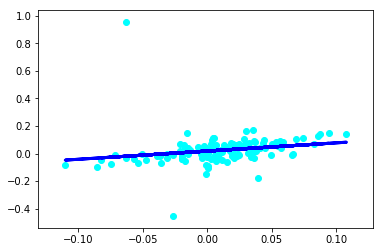

In [21]:
plt.scatter(x,y, color='cyan')

plt.plot(x, reg_obj.predict(x),
         color='blue', 
         linewidth=3)

plt.show()

#### Let us now consider the regression of Ralph Lauren versus SnP500

In [22]:
x1 = combined_data["S&P 500 Returns"].values.reshape(-1,1)
y1 = combined_data["Ralph Lauren Returns"]

In [23]:
reg_obj.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
reg_obj.score(x1,y1)

0.30959404151648556

In [25]:
reg_obj.coef_

array([1.27215466])

In [26]:
reg_obj.intercept_

0.0010357482604950695

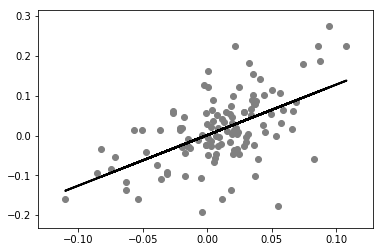

In [27]:
plt.scatter(x1, y1, 
            color='grey')
plt.plot(x1,
         reg_obj.predict(x1),
         color='black', 
         linewidth=2)

plt.show()